# Part 1: The Linear Regression Model

## K-nearest neighbors algorithm
<img src = 'knn_complexity.svg'>

## Linear regression
<img src = 'regression_complexity.png'>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.max_columns = 100
%matplotlib inline

In [2]:
data = pd.read_csv('AmesHousing.txt', sep = '\t')
train = data.iloc[:1460].copy()
test = data.iloc[1460:].copy()
target = 'SalePrice'

## Simple linear regression
$\hat{y} = a_1x_1 + a_0$
* $\hat{y}$ represents the target column while $x_1$ represents the feature column choosed to use in the model. These values are independent of the dataset. 
* $a_0$ and $a_1$ respresent the **parameter** values that are *specific* to the dataset. The goal of simple linear regression is to find the optimal parameter values that best describe the relationship between the feature column and the target column.

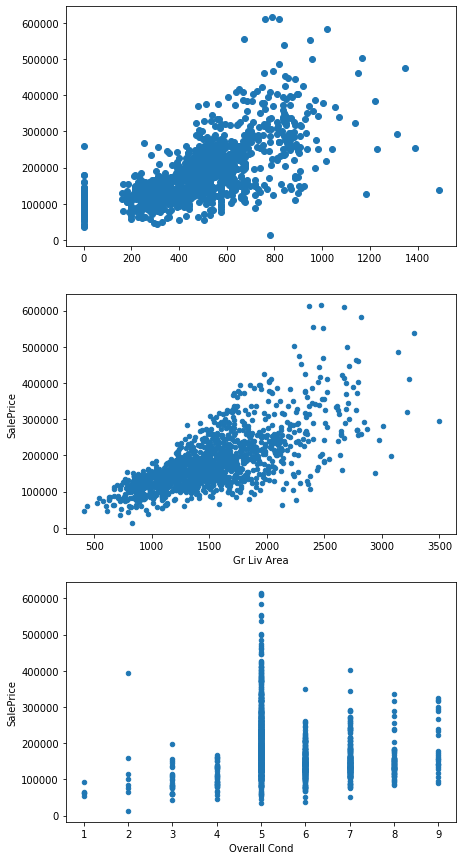

In [3]:
fig = plt.figure(figsize=(7,15))

ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)

ax1.scatter(x = train['Garage Area'], y = train['SalePrice'])
train.plot(x = 'Gr Liv Area', y = 'SalePrice', ax = ax2, kind = 'scatter')
train.plot(x = 'Overall Cond', y = 'SalePrice', ax = ax3, kind = 'scatter')

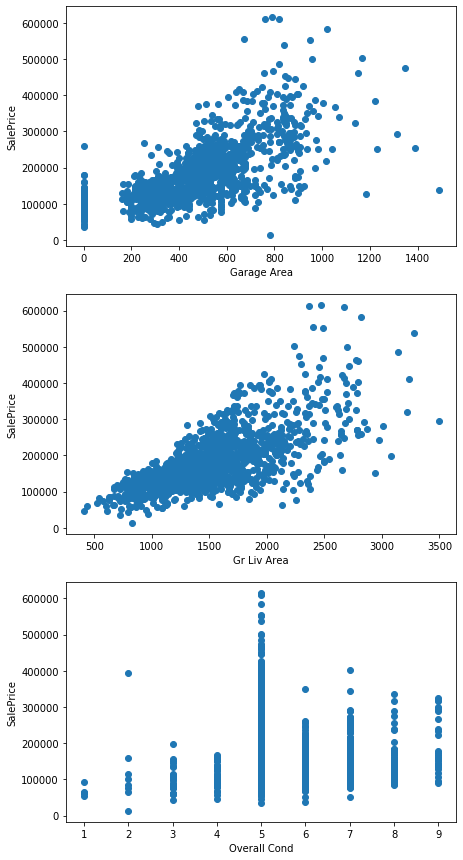

In [4]:
plt.figure(figsize=(7,15))
plt.subplot(311)
plt.scatter(x = train['Garage Area'], y = train['SalePrice'])
plt.xlabel('Garage Area')
plt.ylabel('SalePrice')
plt.subplot(3,1,2)
plt.scatter(x= train['Gr Liv Area'], y = train['SalePrice'])
plt.xlabel('Gr Liv Area')
plt.ylabel('SalePrice')
plt.subplot(313)
#train.plot.scatter('Overall Cond', 'SalePrice')
plt.scatter(x = train['Overall Cond'], y = train['SalePrice'])
plt.xlabel('Overall Cond')
plt.ylabel('SalePrice')
plt.show()

* **Gr Liv Area** feature correlates the most with the SalePrice column.

$\hat{y} = a_1 * {Gr Liv Area} + a_0$

In [5]:
import seaborn as sns

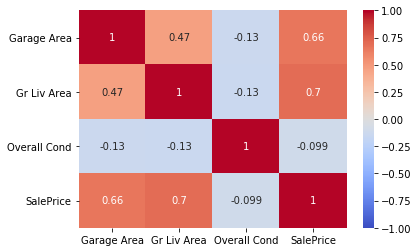

In [6]:
sns.heatmap(train[['Garage Area', 'Gr Liv Area', 'Overall Cond', 'SalePrice']].corr(),
           vmin=-1, cmap='coolwarm', annot=True)

In [7]:
print(train[['Garage Area', 'Gr Liv Area', 'Overall Cond', 'SalePrice']].corr())

              Garage Area  Gr Liv Area  Overall Cond  SalePrice
Garage Area      1.000000     0.465366     -0.132401   0.662397
Gr Liv Area      0.465366     1.000000     -0.133710   0.698990
Overall Cond    -0.132401    -0.133710      1.000000  -0.099395
SalePrice        0.662397     0.698990     -0.099395   1.000000


## Redidual Sum Of Squares (RSS)
* To find the optimal parameters for a linear regression model, we want to optimize the model's **redidual sum of squares** (for RSS).
* Residual (often referred to as errors) describes the difference between the predicted values for the target column ($\hat{y}$) and the true values ($y$):

$RSS = (y_1 - \hat{y_1})^2 + (y_2 - \hat{y_2})^2 + \ldots + (y_n - \hat{y_n})^2$

can be shorten to:

$RSS = \sum_{i=1}^{n}(y_i - \hat{y_i})^2$

* Calculation for RSS seems very similar to the calculation for MSE (mean squared error):
$MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y_i})^2$

## sklearn.linear_model.LinearRegression class. fit()

In [8]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train[['Gr Liv Area']], train['SalePrice'])
a1 = lr.coef_
a0 = lr.intercept_
print(a1,a0)

[116.86624683] 5366.821710056043


$\hat{y} = 116.9x_1 + 5366.8$

In [9]:
from sklearn.metrics import mean_squared_error
predict_train = lr.predict(train[['Gr Liv Area']])
predict_test = lr.predict(test[['Gr Liv Area']])
mse_train = mean_squared_error(train['SalePrice'], predict_train)
mse_test = mean_squared_error(test['SalePrice'], predict_test)

train_rmse = np.sqrt(mse_train)
test_rmse = np.sqrt(mse_test)

print(train_rmse, test_rmse)

56034.362001412796 57088.25161263909


## Multiple linear regression
$\hat{y} = a_0 + a_1x_1 + a_2x_2 + \ldots + a_nx_n$

In [10]:
cols = ['Overall Cond', 'Gr Liv Area']
lr = LinearRegression()
lr.fit(train[cols], train['SalePrice'])
predict_train = lr.predict(train[cols])
predict_test = lr.predict(test[cols])
train_rmse_2 = np.sqrt(mean_squared_error(train['SalePrice'], predict_train))
test_rmse_2 = np.sqrt(mean_squared_error(test['SalePrice'], predict_test))

print(train_rmse_2, test_rmse_2)

56032.398015258674 57066.90779448559


# Part 2: Feature Selection

## After select the model, selecting the appropriate  features for the model is the next importtant step.

Feature columns that don't have any missing values or don't need to be transformed to be useful.

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            1460 non-null   int64  
 1   PID              1460 non-null   int64  
 2   MS SubClass      1460 non-null   int64  
 3   MS Zoning        1460 non-null   object 
 4   Lot Frontage     1211 non-null   float64
 5   Lot Area         1460 non-null   int64  
 6   Street           1460 non-null   object 
 7   Alley            109 non-null    object 
 8   Lot Shape        1460 non-null   object 
 9   Land Contour     1460 non-null   object 
 10  Utilities        1460 non-null   object 
 11  Lot Config       1460 non-null   object 
 12  Land Slope       1460 non-null   object 
 13  Neighborhood     1460 non-null   object 
 14  Condition 1      1460 non-null   object 
 15  Condition 2      1460 non-null   object 
 16  Bldg Type        1460 non-null   object 
 17  House Style   

In [12]:
numerical_train = train[[column_name for column_name in train.columns 
                               if (train[column_name].dtype == 'int64' or train[column_name].dtype == 'float64')]]
numerical_train = train.select_dtypes(include=['int', 'float'])
numerical_train.head()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,1,526301100,20,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,1080.0,1656,0,0,1656,1.0,0.0,1,0,3,1,7,2,1960.0,2.0,528.0,210,62,0,0,0,0,0,5,2010,215000
1,2,526350040,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1961.0,1.0,730.0,140,0,0,0,120,0,0,6,2010,105000
2,3,526351010,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1958.0,1.0,312.0,393,36,0,0,0,0,12500,6,2010,172000
3,4,526353030,20,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,2110.0,2110,0,0,2110,1.0,0.0,2,1,3,1,8,2,1968.0,2.0,522.0,0,0,0,0,0,0,0,4,2010,244000
4,5,527105010,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,1997.0,2.0,482.0,212,34,0,0,0,0,0,3,2010,189900


In [13]:
numerical_train.drop(['PID', 'Year Built', 'Year Remod/Add', 'Garage Yr Blt', 'Mo Sold', 'Yr Sold'], axis = 1,
                    inplace=True)
#numerical_train.info()

/home/ning/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [14]:
null_series = numerical_train.isnull().sum()

In [15]:
full_cols_series = null_series[null_series == 0]
full_cols_series

Order              0
MS SubClass        0
Lot Area           0
Overall Qual       0
Overall Cond       0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr      0
TotRms AbvGrd      0
Fireplaces         0
Garage Cars        0
Garage Area        0
Wood Deck SF       0
Open Porch SF      0
Enclosed Porch     0
3Ssn Porch         0
Screen Porch       0
Pool Area          0
Misc Val           0
SalePrice          0
dtype: int64

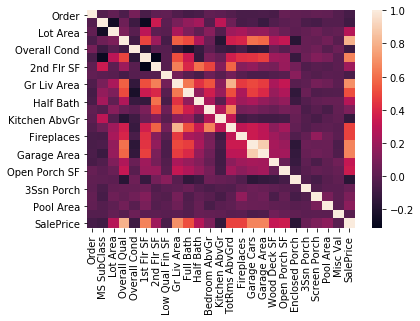

In [16]:
sns.heatmap(train[full_cols_series.index].corr())

In [17]:
len(full_cols_series)

25

## Compare how feature columns correlate with the target column 

In [18]:
train_subset = train[full_cols_series.index].copy()

In [19]:
corr = train_subset.corr()
corr

,Order,MS SubClass,Lot Area,Overall Qual,Overall Cond,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,SalePrice
Order,1.000000,-0.023140,0.020064,-0.049116,0.078547,-0.060288,0.011011,0.016425,-0.036472,-0.074932,-0.057901,0.014836,0.005159,-0.029653,-0.055643,-0.058123,-0.051493,-0.064436,0.035471,0.013040,0.006725,0.026088,0.020716,-0.020449,-0.068181
MS SubClass,-0.023140,1.000000,-0.248209,0.054533,-0.099862,-0.273248,0.342229,-0.001077,0.089580,0.168263,0.223105,-0.024091,0.299163,0.054067,-0.064293,-0.046967,-0.110141,-0.034953,0.000592,0.009778,-0.051771,-0.065956,-0.022696,-0.023721,-0.088504
Lot Area,0.020064,-0.248209,1.000000,0.100290,-0.010353,0.295995,0.005407,-0.013667,0.239224,0.107753,0.011162,0.135366,-0.029323,0.205604,0.232112,0.166939,0.179216,0.110003,0.044313,0.002098,0.022090,0.054119,0.010442,0.025428,0.274730
Overall Qual,-0.049116,0.054533,0.100290,1.000000,-0.083581,0.490056,0.200105,-0.070362,0.562903,0.505102,0.260307,0.045648,-0.175562,0.360203,0.386205,0.609088,0.581106,0.260258,0.319954,-0.173024,0.032751,0.023194,0.072357,-0.009641,0.804562
Overall Cond,0.078547,-0.099862,-0.010353,-0.083581,1.000000,-0.154903,-0.009733,-0.015807,-0.133710,-0.223043,-0.115307,0.002333,-0.095837,-0.116560,-0.056623,-0.156004,-0.132401,0.045171,-0.013770,0.052764,0.033923,0.064596,-0.013420,0.047354,-0.099395
1st Flr SF,-0.060288,-0.273248,0.295995,0.490056,-0.154903,1.000000,-0.311660,-0.011781,0.515404,0.341061,-0.130409,0.095281,0.041101,0.360595,0.429662,0.441351,0.477281,0.206013,0.191891,-0.118127,0.053525,0.120276,0.092472,-0.000546,0.657119
2nd Flr SF,0.011011,0.342229,0.005407,0.200105,-0.009733,-0.311660,1.000000,-0.017831,0.647971,0.396149,0.607469,0.492622,0.127385,0.570879,0.133245,0.169252,0.100471,0.086069,0.189739,0.074540,-0.038210,-0.014297,-0.020832,0.002249,0.202352
Low Qual Fin SF,0.016425,-0.001077,-0.013667,-0.070362,-0.015807,-0.011781,-0.017831,1.000000,0.075539,-0.013896,-0.056455,0.055912,-0.014202,0.073844,-0.011067,-0.047518,-0.049463,-0.029479,-0.014001,0.144095,-0.000762,-0.026807,-0.002486,-0.007269,-0.060352
Gr Liv Area,-0.036472,0.089580,0.239224,0.562903,-0.133710,0.515404,0.647971,0.075539,1.000000,0.625981,0.435941,0.523904,0.145693,0.807301,0.460746,0.498711,0.465366,0.238396,0.321806,-0.012603,0.008241,0.080250,0.054693,0.000851,0.698990
Full Bath,-0.074932,0.168263,0.107753,0.505102,-0.223043,0.341061,0.396149,-0.013896,0.625981,1.000000,0.163007,0.358622,0.183130,0.517731,0.245036,0.468295,0.402743,0.180358,0.255968,-0.139366,0.043506,-0.037269,-0.027145,-0.020655,0.518194


In [20]:
sorted_corrs = corr['SalePrice'].abs().sort_values()

In [21]:
sorted_corrs

Misc Val           0.009903
3Ssn Porch         0.038699
Low Qual Fin SF    0.060352
Order              0.068181
MS SubClass        0.088504
Overall Cond       0.099395
Screen Porch       0.100121
Bedroom AbvGr      0.106941
Kitchen AbvGr      0.130843
Pool Area          0.145474
Enclosed Porch     0.165873
2nd Flr SF         0.202352
Half Bath          0.272870
Lot Area           0.274730
Wood Deck SF       0.319104
Open Porch SF      0.344383
TotRms AbvGrd      0.483701
Fireplaces         0.485683
Full Bath          0.518194
1st Flr SF         0.657119
Garage Area        0.662397
Garage Cars        0.663485
Gr Liv Area        0.698990
Overall Qual       0.804562
SalePrice          1.000000
Name: SalePrice, dtype: float64

## Potential collinearity
* Collinearity is when 2 feature columns are highly correlated and stand the risk of duplicating information. If we have 2 features that convey the same information using 2 different measures or metrics, we don't need to keep both.

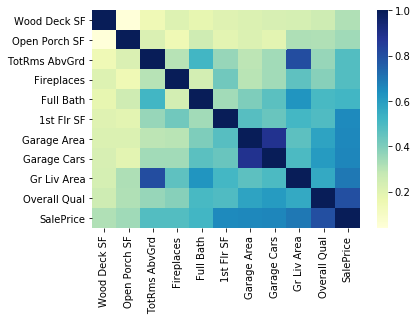

In [22]:
strong_corrs = sorted_corrs[sorted_corrs > 0.3]
corrmat = train_subset[strong_corrs.index].corr()
sns.heatmap(corrmat, cmap = 'YlGnBu')
#plt.figure(figsize=(8,7))

## Following pairs of columns are strongly correlated
* **Gr Liv Area** and **TotRms AbvGrd**
* **Garage Area** and **Garage Cars**

In [23]:
final_corr_cols = strong_corrs.drop(['Garage Cars', 'TotRms AbvGrd'])
print(test[final_corr_cols.index].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 1460 to 2929
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Wood Deck SF   1470 non-null   int64  
 1   Open Porch SF  1470 non-null   int64  
 2   Fireplaces     1470 non-null   int64  
 3   Full Bath      1470 non-null   int64  
 4   1st Flr SF     1470 non-null   int64  
 5   Garage Area    1469 non-null   float64
 6   Gr Liv Area    1470 non-null   int64  
 7   Overall Qual   1470 non-null   int64  
 8   SalePrice      1470 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 103.5 KB
None


In [24]:
features = final_corr_cols.drop(['SalePrice']).index
target = 'SalePrice'

In [25]:
clean_test = test[final_corr_cols.index].dropna()

In [26]:
lr = LinearRegression()
lr.fit(train[features], train[target])
predict_train = lr.predict(train[features])
predict_test = lr.predict(clean_test[features])

In [27]:
train_rmse = np.sqrt(mean_squared_error(train_subset['SalePrice'], predict_train))
test_rmse = np.sqrt(mean_squared_error(clean_test['SalePrice'], predict_test))

print(train_rmse, test_rmse)

34173.97629185852 41032.0261201977


## Remove features with low variance.
* When the value in a feature column have low variance, they don't maeaningfully contribute to the model's predictive capability.
* Rescale all of the columns to vary betwen 0 and 1.:
##
## $\frac{x - min(x)}{max(x) - min(x)}$

In [28]:
train_features = train[features].copy()
unit_train = (train_features - train_features.min()) / (train_features.max() - train_features.min())


In [29]:
## Compute variances
print(unit_train.var())

Wood Deck SF     0.033064
Open Porch SF    0.013938
Fireplaces       0.046589
Full Bath        0.018621
1st Flr SF       0.025814
Garage Area      0.020347
Gr Liv Area      0.023078
Overall Qual     0.024496
dtype: float64


* **Open Porch SF** is the column with the lowest variance and it is farthest from **Ful Bath** than **Full Bath** is from the next one.

In [30]:
features = features.drop('Open Porch SF')
features

Index(['Wood Deck SF', 'Fireplaces', 'Full Bath', '1st Flr SF', 'Garage Area',
       'Gr Liv Area', 'Overall Qual'],
      dtype='object')

In [31]:
lr = LinearRegression()
lr.fit(train[features], train[target])

predict_train = lr.predict(train[features])
predict_test = lr.predict(clean_test[features])

train_rmse_2 = np.sqrt(mean_squared_error(train['SalePrice'], predict_train))
test_rmse_2 = np.sqrt(mean_squared_error(clean_test['SalePrice'], predict_test))

print(train_rmse_2, test_rmse_2)

34372.696707783965 40591.42702437726


# Part 3: Gradient Descent

## model fitting:
* Aim is to minimize the $MSE = \frac{1}{n}\sum_{i=1}^{n}(\hat{y_i} - y_i)^2$, the mean squared error between the predicted labels made using a givne model and the true labels.
* The problem of choosing a set of values that minimize or maximize another function is known as an **optimization problem**.

* The **gradient descent algorithm** works by iteratively trying different parameter values unitl the model with the lowest mean squared error is found.

## An overview of the gradient descent algorithm for a single parameter linear regression model:
* select initial values for the parameter: $a_1$
* repeat unitl convergence (usually implemented with a max number of iterations):
   * calculate the error(MSE) of model that uses current parameter value: ##$MSE(a_1) = \frac{1}{n}\sum_{i=1}^{n}(\hat{y}^{(i)} - y^{(i)})^2$
   * calculate the derivative of the error(MSE) at the current parameter value: $\frac{d}{da_1}MSE(a_1)$
   * update the parameter value by subtracting the derivative times a constant ($\alpha$, called the learning rate): $a_1 := a_1 - \alpha\frac{d}{da_1}MSE(a_1)$ (:= means assigned value in math)

## Cost function (loss function: since we're trying to fit a single parameter model, we can replace $\hat{y}^{(i)}$ with $a_1x_1^{(i)}$ in the cost function: $MSE(a_1) = \frac{1}{n}\sum_{i=1}^{n}(a_1x_1^{(i)} - y^{(i)})^2$ \\ $\frac{d}{da_1} MSE(a_1) = \frac{2}{n} \sum_{i=1}^{n} x_1^{(i)}(a_1x_1^{(i)} - y^{(i)})$

## Main chanllenges: Choosing good initial parameter values and choosing a good learning rate (falls under the domain of hyperparameter optimization)

In [32]:
def derivative(a1, xi_list, yi_list):
    #return the derivative at the current value of a1
    len_data = len(xi_list)
    error = 0
    for i in range(0, len_data):
        error += xi_list[i] * (a1 * xi_list[i] - yi_list[i])
    return 2 * error / len_data

def gradient_descent(xi_list, yi_list, max_iterations, alpha, al_initial):
    a1_list = [al_initial]
    
    for i in range(0, max_iterations):
        a1 = a1_list[i]
        deriv = derivative(a1, xi_list, yi_list)
        a1_new = a1 - alpha * deriv
        a1_list.append(a1_new)
    return a1_list


In [33]:
param_iterations = gradient_descent(train['Gr Liv Area'], train['SalePrice'], 20, 0.0000003, 150)
final_param = param_iterations[-1]

In [34]:
final_param

120.14219147202738

In [35]:
param_iterations

[150,
 106.24258269493151,
 126.61281661731272,
 117.12993450021699,
 121.54446668425497,
 119.48938531096931,
 120.44607998998796,
 120.00071333893449,
 120.20804328256295,
 120.11152571569237,
 120.15645719327628,
 120.13554040327286,
 120.1452777216869,
 120.14074474268385,
 120.14285496418101,
 120.14187260031741,
 120.14232991665213,
 120.142117023815,
 120.14221613105579,
 120.14216999401657,
 120.14219147202738]

## With two parameters: 
## \begin{equation}
MSE(a_0, a_1) = \frac{1}{n}\sum_{i=1}^{n}(a_0 + a_1x_1^{(i)} - y^{(i)})^2
\\
\displaystyle a_0 := a_0 - \alpha \dfrac{d}{da_0} MSE(a_0, a_1)
\\
a_1 := a_1 - \alpha \dfrac{d}{da_1} MSE(a_0, a_1)
\\
\displaystyle  \dfrac{d}{da_1} MSE(a_0, a_1) = \frac{2}{n} \sum\limits_{i=1}^{n} x_1^{(i)}\left(a_0 + a_1x_1^{(i)} - y^{(i)}\right)
\\
\displaystyle  \dfrac{d}{da_0} MSE(a_0, a_1) = \frac{2}{n} \sum\limits_{i=1}^{n} \left(a_0 + a_1x_1^{(i)} - y^{(i)}\right)
\end{equation}

In [36]:
def a1_derivative(a0, a1, xi_list, yi_list):
    len_data = len(xi_list)
    error = 0
    for i in range(0, len_data):
        error += xi_list[i] * (a0 + a1 * xi_list[i] - yi_list[i])
    deriv = 2 * error / len_data
    return deriv

def a0_derivative(a0, a1, xi_list, yi_list):
    len_data = len(xi_list)
    error = 0
    for i in range(len_data):
        error += (a0 + a1 * xi_list[i] - yi_list[i])
    return 2 * error / len_data

def gradient_descent(xi_list, yi_list, max_iterations, alpha, a1_initial, a0_initial):
    a1_list = [a1_initial]
    a0_list = [a0_initial]
    
    for i in range(max_iterations):
        a1 = a1_list[i]
        a0 = a0_list[i]
        
        a1_deriv = a1_derivative(a0, a1, xi_list, yi_list)
        a0_deriv = a0_derivative(a0, a1, xi_list, yi_list)
        
        a1_new = a1 - alpha * a1_deriv
        a0_new = a0 - alpha * a0_deriv
        
        a1_list.append(a1_new)
        a0_list.append(a0_new)
    return (a0_list, a1_list)

In [37]:
a0_params, a1_params = gradient_descent(train['Gr Liv Area'], train['SalePrice'], 20, .0000003, 150, 1000)

In [38]:
a0_params

[1000,
 999.9729797812329,
 999.985903701066,
 999.980232547139,
 999.9832179015052,
 999.9821734177915,
 999.983004932363,
 999.9829631191217,
 999.9833278635107,
 999.98350334434,
 999.9837669324418,
 999.9839895042135,
 999.9842311701743,
 999.9844639472566,
 999.9847008623329,
 999.9849358510428,
 999.9851717365096,
 999.9854072044933,
 999.985642866808,
 999.9858784386378,
 999.986114052572]

In [39]:
a1_params

[150,
 105.34801721547944,
 126.13471917628125,
 116.45794862200977,
 120.96274606972909,
 118.86564116059868,
 119.84189984026605,
 119.38742488614261,
 119.59899502291616,
 119.50050320781361,
 119.54635359313434,
 119.52500879150305,
 119.53494516153384,
 119.53031930255781,
 119.53247255390217,
 119.53146994657168,
 119.53193647656232,
 119.53171908350993,
 119.53182007507831,
 119.53177285001942,
 119.53179462379771]

## For many parameters:
## \begin{equation}
\displaystyle  a_0 := a_0 - \alpha \dfrac{d}{da_0} MSE \\
 a_1 := a_1 - \alpha \dfrac{d}{da_1} MSE \\ 
 a_2 := a_2 - \alpha \dfrac{d}{da_2} MSE \\ 
 \vdots\\
 a_n := a_n - \alpha \dfrac{d}{da_n} MSE \\
 \displaystyle  \dfrac{d}{da_1} MSE = \frac{2}{n} \sum_{i=1}^{n} x_1^{(i)}\left(\hat{y}^{(i)} - y^{(i)}\right) \\  
\displaystyle \dfrac{d}{da_2} MSE = \dfrac{2}{n} \sum_{i=1}^{n} x_2^{(i)}\left(\hat{y}^{(i)} - y^{(i)}\right) \\
 \vdots\\
\displaystyle \dfrac{d}{da_n} MSE = \dfrac{2}{n} \sum_{i=1}^{n} x_n^{(i)}\left(\hat{y}^{(i)} - y^{(i)}\right)  \\
\end{equation}

#  Part 4: Ordinary Least Squares (OLS)
##  Unlike gradient descent, OLS estimation provides a clear formula to directly calculate the optimal parameter values that minimize the cost function.

* To frame the linear regression problem $\hat{y} = a_0 + a_1x_1 + a_2x_2 +\ldots + a_nx_n$ in the matrix form $Xa=\hat{y}$. Where $X$ is a matrix representing the columns from the training set our model uses, $a$ is a vector representing the parameter values, and $\hat{y}$ is the vector of predictions.
<img src='matrix_form.svg'>

## $a = (X^TX)^{-1}X^Ty$

In [40]:
data = pd.read_csv('AmesHousing.txt', delimiter= '\t')
train = data[0:1460]
test = data[1460:]

features = ['Wood Deck SF', 'Fireplaces', 'Full Bath', '1st Flr SF', 'Garage Area',
       'Gr Liv Area', 'Overall Qual']

In [41]:
X = train[features]
y = train['SalePrice']

In [42]:
part1 = np.linalg.inv(np.dot(X.T, X))
ols_estimation = np.dot(np.dot(part1, X.T), y)

first_term = np.linalg.inv(np.dot(np.transpose(X), X))
second_term = np.dot(np.transpose(X), y)
ols_estimation = np.dot(first_term, second_term)

In [43]:
ols_estimation

array([   53.75693376, 18232.31375751, -6434.65300989,    22.53151963,
          86.81522574,    28.08976713, 11397.64135314])

## OLS estimation provides what is known as a **closed form solution** to the problem of finding the optimal parameter values. #A closed form solution is one where a solution can be computed arithmetically with a predictable amount of mathematical operations.

## Error is the difference between the predictions made using the model $\hat{y}$ and the actual labels $y$, it's represents as a vector. The greek letter for E (epsilon $\epsilon$) is often used to represent the error vector: $\epsilon = \hat{y} - y$ So $y = Xa - \epsilon$

## What the cost function looks like in matrix form:
## $J(a) = \frac{1}{n}(Xa-y)^T(Xa-y)$
## The derivative of the cost function:
## $\frac{dJ(a)}{d_a} = 2X^TXa - 2X^Ty$
## To find the vector a that minimize the cost function $J(a)$, set the derivative equal to 0 and solve for a: $2X^TXa - 2X^Ty = 0$,  then $X^TXa = X^Ty$, to cancel $X^TX$ from the left side,
## $a = (X^TX)^{-1}X^Ty$
***

# Part 5: Processing And Transforming Features

## The process of processing and creating new feature is known as feature engineering.

In [44]:
train_null_counts = train.isnull().sum()
print(train_null_counts)

Order               0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      249
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 82, dtype: int64


In [45]:
no_null_columns = train.columns[train.isnull().sum() == 0]
df_no_mv = train[no_null_columns]

In [46]:
train[(train_null_counts[train_null_counts == 0]).index]

,Order,PID,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Exter Qual,Exter Cond,Foundation,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Cars,Garage Area,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,TA,TA,CBlock,GasA,Fa,Y,SBrkr,1656,0,0,1656,1,0,3,1,TA,7,Typ,2,2.0,528.0,P,210,62,0,0,0,0,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,TA,TA,CBlock,GasA,TA,Y,SBrkr,896,0,0,896,1,0,2,1,TA,5,Typ,0,1.0,730.0,Y,140,0,0,0,120,0,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,TA,TA,CBlock,GasA,TA,Y,SBrkr,1329,0,0,1329,1,1,3,1,Gd,6,Typ,0,1.0,312.0,Y,393,36,0,0,0,0,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,Gd,TA,CBlock,GasA,Ex,Y,SBrkr,2110,0,0,2110,2,1,3,1,Ex,8,Typ,2,2.0,522.0,Y,0,0,0,0,0,0,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,TA,TA,PConc,GasA,Gd,Y,SBrkr,928,701,0,1629,2,1,3,1,TA,6,Typ,1,2.0,482.0,Y,212,34,0,0,0,0,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,907253060,60,RL,10316,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,GasA,Ex,Y,SBrkr,992,873,0,1865,2,1,3,1,Gd,7,Typ,1,3.0,839.0,Y,0,184,0,0,0,0,0,6,2008,WD,Normal,235000
1456,1457,907253110,60,RL,10400,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2001,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,GasA,Ex,Y,SBrkr,1290,871,0,2161,2,1,3,1,Gd,8,Typ,1,2.0,570.0,Y,0,84,0,0,0,0,0,6,2008,WD,Normal,230500
1457,1458,907254020,60,RL,9066,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,GasA,Ex,Y,SBrkr,1004,848,0,1852,2,1,3,1,Gd,7,Typ,2,3.0,660.0,Y,224,106,0,0,0,0,0,12,2008,WD,Normal,230000
1458,1459,907254090,60,RL,11404,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,1998,1999,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,GasA,Ex,Y,SBrkr,1153,878,0,2031,2,1,3,1,Gd,8,Typ,1,2.0,541.0,Y,192,84,0,0,0,0,0,7,2008,WD,Normal,222500


In [47]:
train['Utilities'].value_counts()

AllPub    1457
NoSewr       2
NoSeWa       1
Name: Utilities, dtype: int64

## Convert any column that contains no missing values (or an error will be thrown) to the categorical data type using the pandas.Series.astype() method:
### train['Utilities'] = train['Utilities'].astype('category')

In [48]:
text_cols = df_no_mv.select_dtypes(include=['object']).columns

for col in text_cols:
    print(col+":", len(train[col].unique()))
    train[col] = train[col].astype('category')

# To access the underlying numerical representation of a column:
train['Utilities'].cat.codes.value_counts()

MS Zoning: 6
Street: 2
Lot Shape: 4
Land Contour: 4
Utilities: 3
Lot Config: 5
Land Slope: 3
Neighborhood: 26
Condition 1: 9
Condition 2: 6
Bldg Type: 5
House Style: 8
Roof Style: 6
Roof Matl: 5
Exterior 1st: 14
Exterior 2nd: 16
Exter Qual: 4
Exter Cond: 5
Foundation: 6
Heating: 6
Heating QC: 4
Central Air: 2
Electrical: 4
Kitchen Qual: 5
Functional: 7
Paved Drive: 3
Sale Type: 9
Sale Condition: 5


/home/ning/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


0    1457
2       2
1       1
dtype: int64

In [50]:
train['Utilities'].value_counts()

AllPub    1457
NoSewr       2
NoSeWa       1
Name: Utilities, dtype: int64

In [51]:
train['Utilities'].cat.codes.value_counts()

0    1457
2       2
1       1
dtype: int64

## pandas.get_dummies()

In [62]:
dummy_cols = pd.DataFrame()
dummy_cols = train[text_cols].copy()
dummy_cols = pd.get_dummies(dummy_cols, prefix = '', prefix_sep = '')

In [63]:
dummy_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 182 entries, C (all) to Partial
dtypes: uint8(182)
memory usage: 259.6 KB


In [64]:
dummy_cols.head()

,C (all),FV,I (all),RH,RL,RM,Grvl,Pave,IR1,IR2,IR3,Reg,Bnk,HLS,Low,Lvl,AllPub,NoSeWa,NoSewr,Corner,CulDSac,FR2,FR3,Inside,Gtl,Mod,Sev,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,Greens,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,...,CBlock,PConc,Slab,Stone,Wood,Floor,GasA,GasW,Grav,OthW,Wall,Ex,Fa,Gd,TA,N,Y,FuseA,FuseF,FuseP,SBrkr,Ex,Fa,Gd,Po,TA,Maj1,Maj2,Min1,Min2,Mod,Sev,Typ,N,P,Y,COD,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD,Abnorml,Alloca,Family,Normal,Partial
0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [65]:
dummy_cols = pd.DataFrame()
for col in text_cols:
    col_dummies = pd.get_dummies(train[col])
    train = pd.concat([train, col_dummies], axis = 1)
    del train[col]
train.head()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Alley,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Type,Mas Vnr Area,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,...,CBlock,PConc,Slab,Stone,Wood,Floor,GasA,GasW,Grav,OthW,Wall,Ex,Fa,Gd,TA,N,Y,FuseA,FuseF,FuseP,SBrkr,Ex,Fa,Gd,Po,TA,Maj1,Maj2,Min1,Min2,Mod,Sev,Typ,N,P,Y,COD,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD,Abnorml,Alloca,Family,Normal,Partial
0,1,526301100,20,141.0,31770,NaN,6,5,1960,1960,Stone,112.0,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,1656,0,0,1656,1.0,0.0,1,0,3,1,7,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,210,62,0,0,0,0,NaN,NaN,NaN,...,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,2,526350040,20,80.0,11622,NaN,5,6,1961,1961,None,0.0,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,140,0,0,0,120,0,NaN,MnPrv,NaN,...,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,3,526351010,20,81.0,14267,NaN,6,6,1958,1958,BrkFace,108.0,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,393,36,0,0,0,0,NaN,NaN,Gar2,...,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,4,526353030,20,93.0,11160,NaN,7,5,1968,1968,None,0.0,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,2110,0,0,2110,1.0,0.0,2,1,3,1,8,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,0,0,0,0,0,0,NaN,NaN,NaN,...,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,5,527105010,60,74.0,13830,NaN,5,5,1997,1998,None,0.0,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,212,34,0,0,0,0,NaN,MnPrv,NaN,...,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [67]:
print(train[['Year Remod/Add', 'Year Built']].head())

   Year Remod/Add  Year Built
0            1960        1960
1            1961        1961
2            1958        1958
3            1968        1968
4            1998        1997


In [68]:
train['years_until_remod'] = train['Year Remod/Add'] - train['Year Built']

## Handle columns with missing values: only 1460 training examples (with ~80 potentially useful features), we don't want to remove any of these rows from the dataset. 
## Imputation technique

In [69]:
ata = pd.read_csv('AmesHousing.txt', delimiter="\t")
train = data[0:1460]
test = data[1460:]

train_null_counts = train.isnull().sum()

In [73]:
df_missing_values = train[train.columns[(train_null_counts > 0) & (train_null_counts < 584)]]
df_missing_values = train[train_null_counts[(train_null_counts > 0) & (train_null_counts<584)].index]

In [74]:
df_missing_values.isnull().sum()

Lot Frontage      249
Mas Vnr Type       11
Mas Vnr Area       11
Bsmt Qual          40
Bsmt Cond          40
Bsmt Exposure      41
BsmtFin Type 1     40
BsmtFin SF 1        1
BsmtFin Type 2     41
BsmtFin SF 2        1
Bsmt Unf SF         1
Total Bsmt SF       1
Bsmt Full Bath      1
Bsmt Half Bath      1
Garage Type        74
Garage Yr Blt      75
Garage Finish      75
Garage Qual        75
Garage Cond        75
dtype: int64

In [75]:
df_missing_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Frontage    1211 non-null   float64
 1   Mas Vnr Type    1449 non-null   object 
 2   Mas Vnr Area    1449 non-null   float64
 3   Bsmt Qual       1420 non-null   object 
 4   Bsmt Cond       1420 non-null   object 
 5   Bsmt Exposure   1419 non-null   object 
 6   BsmtFin Type 1  1420 non-null   object 
 7   BsmtFin SF 1    1459 non-null   float64
 8   BsmtFin Type 2  1419 non-null   object 
 9   BsmtFin SF 2    1459 non-null   float64
 10  Bsmt Unf SF     1459 non-null   float64
 11  Total Bsmt SF   1459 non-null   float64
 12  Bsmt Full Bath  1459 non-null   float64
 13  Bsmt Half Bath  1459 non-null   float64
 14  Garage Type     1386 non-null   object 
 15  Garage Yr Blt   1385 non-null   float64
 16  Garage Finish   1385 non-null   object 
 17  Garage Qual     1385 non-null   o

In [76]:
# Only select float columns
missing_floats = df_missing_values.select_dtypes(include = ['float'])

# Returns a data frame with missing values replaced with 0.
fill_with_zero = missing_floats.fillna(0)
# replace with mean
fill_with_mean = missing_floats.fillna(missing_floats.mean())

In [77]:
float_cols = df_missing_values.select_dtypes(include = ['float'])
float_cols = float_cols.fillna(float_cols.mean())
float_cols.isnull().sum()

Lot Frontage      0
Mas Vnr Area      0
BsmtFin SF 1      0
BsmtFin SF 2      0
Bsmt Unf SF       0
Total Bsmt SF     0
Bsmt Full Bath    0
Bsmt Half Bath    0
Garage Yr Blt     0
dtype: int64